TASK 1
======

In [1]:
!pip install --quiet "scikit-learn>=0.23"

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from itertools import chain




import pandas as pd
from pandas.api.types import CategoricalDtype

In [3]:
from autorank import autorank, create_report, plot_stats

In [4]:
DATA = pd.read_csv('data_A2.csv', sep = ',', header = None, na_values = '?')
DATA

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.919015,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398
1,0.267386,NaN,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,1.394421,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773
2,2.946515,-1.594067,NaN,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.290845,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401
3,-4.581082,-0.001274,1.197022,NaN,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,1.046033,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303
4,-2.123360,-0.266587,1.781999,-0.039342,NaN,0.895856,3.756880,-4.583167,1.652762,7.673453,...,1.371734,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.318539,0.539550,-0.144831,1.402720,2.018928,-0.033435,-0.763604,-4.475018,1.098775,2.187650,...,1.163138,1.427695,0.753621,0.467884,1.402720,NaN,-2.008609,0.279494,4.702728,-2.272688
996,-5.843779,0.341371,-0.612153,-0.209380,-1.398469,0.550250,-1.623379,-0.924526,-2.274803,-3.090194,...,1.998539,-0.695267,1.238735,1.192938,-0.209380,-0.972033,NaN,-2.624541,0.013214,1.422758
997,3.406411,0.321762,0.286231,2.116516,-1.548059,-1.626494,3.787104,2.476920,-2.113878,-7.427621,...,-2.762413,-2.860776,-6.281361,-3.061634,2.116516,6.246774,-0.847790,NaN,-8.109827,2.108502
998,-2.167186,0.627939,-0.993588,0.902711,-1.024744,-0.416702,3.966772,6.068817,-2.394340,-1.352014,...,-0.981470,-2.427518,-0.065137,-1.653230,0.902711,1.644251,-0.421722,-3.231510,NaN,-1.626739


In [5]:
labels = pd.read_csv('labels_A2.csv', sep=',', header=None, na_values ='?', dtype='int32')

labels

,0
0,1
1,0
2,0
3,0
4,1
...,...
995,1
996,0
997,0
998,1


In [6]:
y = labels.to_numpy()
X = DATA.to_numpy()

y = y.astype('int')

print(y.shape, X.shape)

(1000, 1) (1000, 100)


### IMPUTING DATA TO REMOVE 'NaN' VALUES

Firstly, creating copies of the dataset and imputing these copies with different strategies to find the one that returns the best results.

In [7]:
from sklearn.impute import SimpleImputer

isnan = np.isnan(X)

X_mean_copy = X.copy()
X_median_copy = X.copy()
X_mf_copy = X.copy()

imputing = SimpleImputer(missing_values=np.nan, strategy='mean')
imputing.fit(X_mean_copy)
X_filled_mean = imputing.transform(X_mean_copy)

imputing2 = SimpleImputer(missing_values=np.nan, strategy='median')
imputing2.fit(X_median_copy)
X_filled_median = imputing2.transform(X_median_copy)

imputing3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputing3.fit(X_mf_copy)
X_filled_mf = imputing3.transform(X_mf_copy)

print(X_filled_mean)
print(X_filled_median)
print(X_filled_mf)

[[-0.03640934 -0.17659526 -4.12664374 ... -0.82330291 -5.27126666
   2.35339793]
 [ 0.26738568  0.01051725 -1.8207978  ...  1.10567555 -0.34454961
  -6.6537733 ]
 [ 2.94651515 -1.5940672   0.53939977 ...  3.42263394 -0.27214566
  -3.34540104]
 ...
 [ 3.40641099  0.32176174  0.28623093 ...  0.1004745  -8.10982707
   2.10850165]
 [-2.16718563  0.62793907 -0.99358794 ... -3.23150977 -0.15775602
  -1.62673851]
 [-3.62165864 -1.62856111 -1.99165251 ...  0.07252107 -2.60592028
  -0.26877021]]
[[-0.10388478 -0.17659526 -4.12664374 ... -0.82330291 -5.27126666
   2.35339793]
 [ 0.26738568  0.04293379 -1.8207978  ...  1.10567555 -0.34454961
  -6.6537733 ]
 [ 2.94651515 -1.5940672   0.39221346 ...  3.42263394 -0.27214566
  -3.34540104]
 ...
 [ 3.40641099  0.32176174  0.28623093 ...  0.27599016 -8.10982707
   2.10850165]
 [-2.16718563  0.62793907 -0.99358794 ... -3.23150977 -0.11919578
  -1.62673851]
 [-3.62165864 -1.62856111 -1.99165251 ...  0.07252107 -2.60592028
  -0.10275144]]
[[-12.91301453  

In [8]:
seed = 333

meanTreeCVMeans = []
meanTreeScoreMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train, X_test, y_train, y_test = train_test_split(X_filled_mean, y, test_size=0.2, random_state = testseed)
    
    meanTree = RandomForestClassifier(random_state= testseed)
    meanTree.fit(X_train, y_train.ravel())
    predicted = meanTree.predict(X_test)
    print("Tree Accuracy: ", accuracy_score(y_test, predicted))
    meanTreeScoreMeans.append(accuracy_score(y_test, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(meanTree, X_train, y_train.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    meanTreeCVMeans.append(score)
    
print(meanTreeCVMeans)

meanTreeScore = np.mean(meanTreeCVMeans)
meanTreeOutputScore = np.mean(meanTreeScoreMeans)

print("Mean CV Score: ", meanTreeScore)
print("Mean Tree Score: ", meanTreeOutputScore)

Tree Accuracy:  0.755
StratifiedKFold Mean test accuracy: 69.875%

0.69875
Tree Accuracy:  0.775
StratifiedKFold Mean test accuracy: 70.500%

0.7050000000000001
Tree Accuracy:  0.69
StratifiedKFold Mean test accuracy: 71.250%

0.7125
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 72.250%

0.7224999999999999
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 71.125%

0.71125
Tree Accuracy:  0.775
StratifiedKFold Mean test accuracy: 71.125%

0.71125
Tree Accuracy:  0.715
StratifiedKFold Mean test accuracy: 71.500%

0.7150000000000001
Tree Accuracy:  0.69
StratifiedKFold Mean test accuracy: 71.125%

0.7112499999999999
Tree Accuracy:  0.7
StratifiedKFold Mean test accuracy: 72.125%

0.7212500000000001
Tree Accuracy:  0.7
StratifiedKFold Mean test accuracy: 71.000%

0.71
[0.69875, 0.7050000000000001, 0.7125, 0.7224999999999999, 0.71125, 0.71125, 0.7150000000000001, 0.7112499999999999, 0.7212500000000001, 0.71]
Mean CV Score:  0.711875
Mean Tree Score:  0.724


In [9]:
medianTreeCVMeans = []
medianTreeScoreMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_filled_median, y, test_size=0.2, random_state = testseed)
    
    medianTree = RandomForestClassifier(random_state= testseed)
    medianTree.fit(X_train2, y_train2.ravel())
    predicted2 = medianTree.predict(X_test2)
    print("Tree Accuracy: ", accuracy_score(y_test2, predicted2))
    medianTreeScoreMeans.append(accuracy_score(y_test2, predicted2))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(medianTree, X_train2, y_train2.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    medianTreeCVMeans.append(score)
    
print(medianTreeCVMeans)

medianTreeScore = np.mean(medianTreeCVMeans)
medianTreeOutputScore = np.mean(medianTreeScoreMeans)

print("Mean CV Score: ", medianTreeScore)
print("Mean Tree Score: ", medianTreeOutputScore)

Tree Accuracy:  0.775
StratifiedKFold Mean test accuracy: 68.500%

0.6849999999999999
Tree Accuracy:  0.76
StratifiedKFold Mean test accuracy: 70.625%

0.7062499999999999
Tree Accuracy:  0.73
StratifiedKFold Mean test accuracy: 71.125%

0.7112499999999999
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 72.125%

0.7212500000000001
Tree Accuracy:  0.71
StratifiedKFold Mean test accuracy: 70.375%

0.70375
Tree Accuracy:  0.765
StratifiedKFold Mean test accuracy: 70.125%

0.7012499999999999
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 72.000%

0.72
Tree Accuracy:  0.7
StratifiedKFold Mean test accuracy: 71.250%

0.7125000000000001
Tree Accuracy:  0.7
StratifiedKFold Mean test accuracy: 72.625%

0.72625
Tree Accuracy:  0.695
StratifiedKFold Mean test accuracy: 71.750%

0.7174999999999999
[0.6849999999999999, 0.7062499999999999, 0.7112499999999999, 0.7212500000000001, 0.70375, 0.7012499999999999, 0.72, 0.7125000000000001, 0.72625, 0.7174999999999999]
Mean CV Score:  0.71

In [10]:
mfTreeCVMeans = []
mfTreeScoreMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_filled_mf, y, test_size=0.2, random_state = testseed)
    
    mfTree = RandomForestClassifier(random_state= testseed)
    mfTree.fit(X_train3, y_train3.ravel())
    predicted3 = mfTree.predict(X_test3)
    print("Tree Accuracy: ", accuracy_score(y_test3, predicted3))
    mfTreeScoreMeans.append(accuracy_score(y_test3, predicted3))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(mfTree, X_train3, y_train3.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    mfTreeCVMeans.append(score)
    
print(mfTreeCVMeans)

mfTreeCVScore = np.mean(mfTreeCVMeans)
mfTreeOutputScore = np.mean(mfTreeScoreMeans)

print("Mean CV Score: ", mfTreeCVScore)
print("Mean Tree Score: ", mfTreeOutputScore)


Tree Accuracy:  0.76
StratifiedKFold Mean test accuracy: 67.250%

0.6725000000000001
Tree Accuracy:  0.745
StratifiedKFold Mean test accuracy: 70.750%

0.7075
Tree Accuracy:  0.73
StratifiedKFold Mean test accuracy: 71.250%

0.7125
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 73.000%

0.73
Tree Accuracy:  0.75
StratifiedKFold Mean test accuracy: 70.125%

0.7012500000000002
Tree Accuracy:  0.75
StratifiedKFold Mean test accuracy: 70.250%

0.7024999999999999
Tree Accuracy:  0.73
StratifiedKFold Mean test accuracy: 72.500%

0.725
Tree Accuracy:  0.695
StratifiedKFold Mean test accuracy: 73.625%

0.73625
Tree Accuracy:  0.695
StratifiedKFold Mean test accuracy: 72.625%

0.72625
Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 71.625%

0.7162500000000002
[0.6725000000000001, 0.7075, 0.7125, 0.73, 0.7012500000000002, 0.7024999999999999, 0.725, 0.73625, 0.72625, 0.7162500000000002]
Mean CV Score:  0.7130000000000001
Mean Tree Score:  0.7295


Applying imputation with median values to original dataset

In [11]:
imputing = SimpleImputer(missing_values=np.nan, strategy='median')
imputing.fit(X)
newX = imputing.transform(X)

print(newX)

[[-0.10388478 -0.17659526 -4.12664374 ... -0.82330291 -5.27126666
   2.35339793]
 [ 0.26738568  0.04293379 -1.8207978  ...  1.10567555 -0.34454961
  -6.6537733 ]
 [ 2.94651515 -1.5940672   0.39221346 ...  3.42263394 -0.27214566
  -3.34540104]
 ...
 [ 3.40641099  0.32176174  0.28623093 ...  0.27599016 -8.10982707
   2.10850165]
 [-2.16718563  0.62793907 -0.99358794 ... -3.23150977 -0.11919578
  -1.62673851]
 [-3.62165864 -1.62856111 -1.99165251 ...  0.07252107 -2.60592028
  -0.10275144]]


TASK 2
======

Utilizing RFE feature selection to further process the data to get the 10 best features.

In [84]:
featureSelect = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
featureSelect.fit(newX, y)
newX= featureSelect.fit_transform(newX, y)

print(featureSelect.support_)

print(newX)
print(newX.shape)

[ True  True  True  True  True  True  True  True  True  True]
[[-0.10388478 -2.91963929 -0.20433017 ... -0.20760601 -0.72289957
  -1.82595091]
 [ 0.26738568 -1.12961117  0.06619492 ... -0.76806967  2.49297253
  -1.98086402]
 [ 2.94651515  0.39332371 -0.67137599 ...  0.81093247 -0.24785755
  -1.65219553]
 ...
 [ 3.40641099 -2.11387845  0.47462734 ...  0.58499158  1.43568029
  -3.06163402]
 [-2.16718563 -2.39433995  0.23433594 ...  0.9678646  -1.98683152
  -1.65323029]
 [-3.62165864 -2.0445179  -0.30160947 ... -2.89039235  2.61232767
  -0.86739051]]
(1000, 10)


TASK 3
====== 

DECISION TREE

In [13]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(X_train4, y_train4.ravel())
    predicted = decisionTree.predict(X_test4)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans)

DecisionTreeScore = np.mean(DecisionTreeMeans)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.665
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.61
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.565
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.61
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.685
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.64
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.6
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.61
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.56
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.665, 0.615, 0.61, 0.565, 0.61, 0.685, 0.64,

RANDOM FOREST

In [14]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(X_train4, y_train4.ravel())
    predicted = randomForest.predict(X_test4)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans.append(accuracy_score(y_test4, predicted))
    
    multi = RepeatedKFold(n_splits = 5, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans)

RandomForestScore = np.mean(RandomForestMeans)

RandomForestSDframe = pd.DataFrame(RandomForestMeans)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.74
RepeatedKFold Mean test accuracy: 71.500%

CV score:  0.7149999999999999 

Random Forest Accuracy:  0.72
RepeatedKFold Mean test accuracy: 71.650%

CV score:  0.7164999999999999 

Random Forest Accuracy:  0.695
RepeatedKFold Mean test accuracy: 71.660%

CV score:  0.7166 

Random Forest Accuracy:  0.71
RepeatedKFold Mean test accuracy: 71.240%

CV score:  0.7124000000000001 

Random Forest Accuracy:  0.745
RepeatedKFold Mean test accuracy: 71.530%

CV score:  0.7153 

Random Forest Accuracy:  0.745
RepeatedKFold Mean test accuracy: 72.020%

CV score:  0.7202 

Random Forest Accuracy:  0.725
RepeatedKFold Mean test accuracy: 71.280%

CV score:  0.7127999999999999 

Random Forest Accuracy:  0.685
RepeatedKFold Mean test accuracy: 71.940%

CV score:  0.7193999999999999 

Random Forest Accuracy:  0.69
RepeatedKFold Mean test accuracy: 71.390%

CV score:  0.7139 

Random Forest Accuracy:  0.705
RepeatedKFold Mean test accuracy: 71.770%

CV score:  0.71770000000

DECISION STUMP

In [15]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(X_train4, y_train4.ravel())
    predicted = decisionStump.predict(X_test4)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans)

DecisionStumpScore = np.mean(DecisionStumpMeans)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.65
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.595
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.58
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.625
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.625
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.595
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.62
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.535
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.65

PRUNED DECISION TREE

In [16]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(X_train4, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)
    
    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(X_train4, y_train4.ravel())
    predicted = prunedDecisionTree.predict(X_test4)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.005029861888764468
Pruned Decision Tree Accuracy:  0.7
StratifiedKFold Mean test accuracy: 68.200%

CV score:  0.682 

0.0030133928571428573
Pruned Decision Tree Accuracy:  0.63
StratifiedKFold Mean test accuracy: 65.000%

CV score:  0.6500000000000001 

0.00761278195488722
Pruned Decision Tree Accuracy:  0.635
StratifiedKFold Mean test accuracy: 67.600%

CV score:  0.676 

0.005547823339320087
Pruned Decision Tree Accuracy:  0.65
StratifiedKFold Mean test accuracy: 64.900%

CV score:  0.649 

0.004726562499999998
Pruned Decision Tree Accuracy:  0.735
StratifiedKFold Mean test accuracy: 69.600%

CV score:  0.696 

0.006694773906597486
Pruned Decision Tree Accuracy:  0.68
StratifiedKFold Mean test accuracy: 68.300%

CV score:  0.683 

0.010689754587315331
Pruned Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 65.600%

CV score:  0.6559999999999999 

0.008037587772487724
Pruned Decision Tree Accuracy:  0.545
StratifiedKFold Mean test accuracy: 67.000%

CV score:  0.67

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.680          0.740           0.640                 0.690
1          0.565          0.705           0.585                 0.620
2          0.590          0.730           0.565                 0.625
3          0.555          0.710           0.610                 0.645
4          0.600          0.765           0.640                 0.690
5          0.665          0.760           0.605                 0.680
6          0.645          0.725           0.610                 0.670
7          0.655          0.690           0.550                 0.645
8          0.595          0.685           0.510                 0.665
9          0.545          0.700           0.530                 0.570
RankResult(rankdf=
                      meanrank    mean       std  ci_lower  ci_upper  \
Random Forest              1.0  0.7210  0.027869  0.696654  0.745346   
Pruned Decision Tree       2.1  0.6500  0.037565  0.625654  0.67434

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

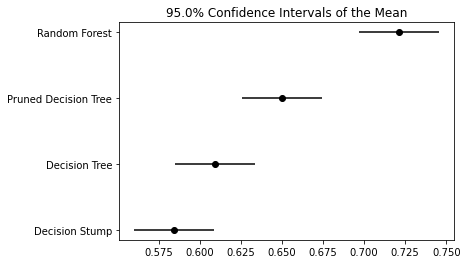

In [43]:
model_means = {
    'Decision Tree':DecisionTreeMeans,
    'Random Forest':RandomForestMeans,
    'Decision Stump':DecisionStumpMeans,
    'Pruned Decision Tree':prunedDecisionTreeMeans
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)

TASK 4
======

Adding additive noise to the dataset and re-training the models.

In [85]:
random = np.random.default_rng()

AddiNoise = np.random.normal(0, 0.2, np.shape(newX))

xAdditiveNoise = newX + np.multiply(AddiNoise, np.average(newX, axis=0))

print(xAdditiveNoise)

[[-0.10223385 -2.88661551 -0.20217874 ... -0.21596364 -0.72171868
  -1.84822607]
 [ 0.26940068 -1.10072357  0.06484207 ... -0.76880475  2.49261328
  -1.96020332]
 [ 2.94892061  0.35150328 -0.67596483 ...  0.81659159 -0.25001544
  -1.67830134]
 ...
 [ 3.40395391 -2.10899928  0.47554047 ...  0.5736226   1.44608109
  -3.08337013]
 [-2.17226587 -2.33107503  0.23340754 ...  0.95827699 -1.99405489
  -1.65666617]
 [-3.61933918 -2.04246296 -0.2995694  ... -2.8761662   2.61677841
  -0.89293053]]


------------------------------
DECISION TREE + ADDITIVE NOISE

In [52]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans2 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xAdditiveNoise, y, test_size=0.2, random_state = testseed)
    
    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(X_train4, y_train4.ravel())
    predicted = decisionTree.predict(X_test4)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans2.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans2)

DecisionTreeScore = np.mean(DecisionTreeMeans2)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans2)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.665
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.57
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.61
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.58
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.63
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.535
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.59, 0.575, 0.665, 0.57, 0.61, 0.67, 0.58, 

------------------------------
RANDOM FOREST + ADDITIVE NOISE

In [53]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans2 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xAdditiveNoise, y, test_size=0.2, random_state = testseed)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(X_train4, y_train4.ravel())
    predicted = randomForest.predict(X_test4)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans2.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans2)

RandomForestScore = np.mean(RandomForestMeans2)

RandomForestSDframe = pd.DataFrame(RandomForestMeans2)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.735
StratifiedKFold Mean test accuracy: 72.000%

CV score:  0.72 

Random Forest Accuracy:  0.735
StratifiedKFold Mean test accuracy: 70.500%

CV score:  0.705 

Random Forest Accuracy:  0.695
StratifiedKFold Mean test accuracy: 71.800%

CV score:  0.7180000000000001 

Random Forest Accuracy:  0.685
StratifiedKFold Mean test accuracy: 70.800%

CV score:  0.708 

Random Forest Accuracy:  0.74
StratifiedKFold Mean test accuracy: 72.700%

CV score:  0.727 

Random Forest Accuracy:  0.76
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.705
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.685
StratifiedKFold Mean test accuracy: 72.300%

CV score:  0.723 

Random Forest Accuracy:  0.69
StratifiedKFold Mean test accuracy: 72.200%

CV score:  0.722 

Random Forest Accuracy:  0.735
StratifiedKFold Mean test accuracy: 72.100%

CV score:  0.7209999999999999 

[0.735, 0.735, 0.695, 0.685,

-------------------------------
DECISION STUMP + ADDITIVE NOISE

In [54]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans2 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xAdditiveNoise, y, test_size=0.2, random_state = testseed)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(X_train4, y_train4.ravel())
    predicted = decisionStump.predict(X_test4)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans2.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans2)

DecisionStumpScore = np.mean(DecisionStumpMeans2)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans2)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.63
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.595
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.56
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.625
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.63
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.59
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.61
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.525
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.565
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.63, 

-------------------------------------
PRUNED DECISION TREE + ADDITIVE NOISE

In [55]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans2 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xAdditiveNoise, y, test_size=0.2, random_state = testseed)
    
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(X_train4, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)

    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(X_train4, y_train4.ravel())
    predicted = prunedDecisionTree.predict(X_test4)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans2.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans2)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans2)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans2)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.004650297619047616
Pruned Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 67.500%

CV score:  0.675 

0.0070898437500000015
Pruned Decision Tree Accuracy:  0.675
StratifiedKFold Mean test accuracy: 68.000%

CV score:  0.68 

0.006985822346179853
Pruned Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 68.500%

CV score:  0.6849999999999999 

0.023625502356813086
Pruned Decision Tree Accuracy:  0.655
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

0.00770761485746424
Pruned Decision Tree Accuracy:  0.72
StratifiedKFold Mean test accuracy: 67.800%

CV score:  0.678 

0.006650391436109654
Pruned Decision Tree Accuracy:  0.685
StratifiedKFold Mean test accuracy: 68.300%

CV score:  0.683 

0.01074090118285792
Pruned Decision Tree Accuracy:  0.65
StratifiedKFold Mean test accuracy: 65.600%

CV score:  0.6559999999999999 

0.0058370495842661185
Pruned Decision Tree Accuracy:  0.6
StratifiedKFold Mean test accuracy: 67.100%

CV score:  0.670

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.590          0.735           0.630                 0.670
1          0.575          0.735           0.595                 0.675
2          0.665          0.695           0.560                 0.620
3          0.570          0.685           0.625                 0.655
4          0.610          0.740           0.630                 0.720
5          0.670          0.760           0.590                 0.685
6          0.580          0.705           0.610                 0.650
7          0.575          0.685           0.555                 0.600
8          0.630          0.690           0.525                 0.630
9          0.535          0.735           0.565                 0.535
RankResult(rankdf=
                      meanrank    mean       std  ci_lower  ci_upper  \
Random Forest              1.0  0.7165  0.027391  0.692038  0.740962   
Pruned Decision Tree       2.3  0.6440  0.051467  0.619538  0.66846

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

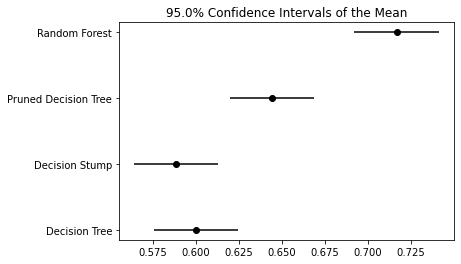

In [56]:
model_means = {
    'Decision Tree':DecisionTreeMeans2,
    'Random Forest':RandomForestMeans2,
    'Decision Stump':DecisionStumpMeans2,
    'Pruned Decision Tree':prunedDecisionTreeMeans2
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)

TASK 5
======

Adding multiplicative noise to the dataset and re-training the models.

In [86]:
multNoise = np.random.normal(1, 0.2, np.shape(newX))

xMultiNoise = np.multiply(newX, multNoise)

print(xMultiNoise)

[[-0.08026335 -3.78228771 -0.1981627  ... -0.21858487 -0.82182924
  -1.09646803]
 [ 0.28409008 -1.39298523  0.06080404 ... -0.85236658  3.01202697
  -1.93137658]
 [ 2.9120361   0.34562728 -0.5801672  ...  0.43829689 -0.27263571
  -1.33377033]
 ...
 [ 2.52567401 -1.97766863  0.36593886 ...  0.53515231  1.75158999
  -3.10798893]
 [-2.81439771 -2.53916807  0.25360229 ...  0.92730587 -2.6612045
  -1.86935478]
 [-2.36629631 -1.71184998 -0.24566499 ... -2.70428746  2.94678672
  -0.99847129]]


------------------------------------
DECISION TREE + MULTIPLICATIVE NOISE

In [59]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans3 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xMultiNoise, y, test_size=0.2, random_state = testseed)
    
    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(X_train4, y_train4.ravel())
    predicted = decisionTree.predict(X_test4)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans3.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans3)

DecisionTreeScore = np.mean(DecisionTreeMeans3)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans3)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.595
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.645
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.605
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.54
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.58
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.605
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.62, 0.615, 0.595, 0.575, 0.645, 0.605, 0

------------------------------------
RANDOM FOREST + MULTIPLICATIVE NOISE

In [60]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans3 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xMultiNoise, y, test_size=0.2, random_state = testseed)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(X_train4, y_train4.ravel())
    predicted = randomForest.predict(X_test4)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans3.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans3)

RandomForestScore = np.mean(RandomForestMeans3)

RandomForestSDframe = pd.DataFrame(RandomForestMeans3)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.76
StratifiedKFold Mean test accuracy: 72.000%

CV score:  0.72 

Random Forest Accuracy:  0.72
StratifiedKFold Mean test accuracy: 70.500%

CV score:  0.705 

Random Forest Accuracy:  0.69
StratifiedKFold Mean test accuracy: 71.800%

CV score:  0.7180000000000001 

Random Forest Accuracy:  0.685
StratifiedKFold Mean test accuracy: 70.800%

CV score:  0.708 

Random Forest Accuracy:  0.715
StratifiedKFold Mean test accuracy: 72.700%

CV score:  0.727 

Random Forest Accuracy:  0.76
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.705
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.64
StratifiedKFold Mean test accuracy: 72.300%

CV score:  0.723 

Random Forest Accuracy:  0.645
StratifiedKFold Mean test accuracy: 72.200%

CV score:  0.722 

Random Forest Accuracy:  0.72
StratifiedKFold Mean test accuracy: 72.100%

CV score:  0.7209999999999999 

[0.76, 0.72, 0.69, 0.685, 0.715

-------------------------------------
DECISION STUMP + MULTIPLICATIVE NOISE

In [61]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans3 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xMultiNoise, y, test_size=0.2, random_state = testseed)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(X_train4, y_train4.ravel())
    predicted = decisionStump.predict(X_test4)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans3.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans3)

DecisionStumpScore = np.mean(DecisionStumpMeans3)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans3)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.65
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.6
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.58
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.535
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.6
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.585
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.615
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.535
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.57
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.65, 0.

-------------------------------------------
PRUNED DECISION TREE + MULTIPLICATIVE NOISE 

In [62]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans3 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(xMultiNoise, y, test_size=0.2, random_state = testseed)
    
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(X_train4, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)
    
    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(X_train4, y_train4.ravel())
    predicted = prunedDecisionTree.predict(X_test4)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans3.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans3)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans3)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans3)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.008067019785769798
Pruned Decision Tree Accuracy:  0.665
StratifiedKFold Mean test accuracy: 65.200%

CV score:  0.6519999999999999 

0.006562500000000001
Pruned Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 67.800%

CV score:  0.6779999999999999 

0.00475083918217882
Pruned Decision Tree Accuracy:  0.635
StratifiedKFold Mean test accuracy: 67.900%

CV score:  0.679 

0.003255208333333333
Pruned Decision Tree Accuracy:  0.6
StratifiedKFold Mean test accuracy: 65.000%

CV score:  0.65 

0.007212547572367663
Pruned Decision Tree Accuracy:  0.685
StratifiedKFold Mean test accuracy: 68.200%

CV score:  0.682 

0.008052445323783436
Pruned Decision Tree Accuracy:  0.645
StratifiedKFold Mean test accuracy: 67.500%

CV score:  0.675 

0.002666666666666667
Pruned Decision Tree Accuracy:  0.645
StratifiedKFold Mean test accuracy: 65.900%

CV score:  0.659 

0.005834292763157896
Pruned Decision Tree Accuracy:  0.52
StratifiedKFold Mean test accuracy: 67.100%

CV score:  0.6

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.620          0.760           0.650                 0.665
1          0.615          0.720           0.600                 0.615
2          0.595          0.690           0.580                 0.635
3          0.575          0.685           0.535                 0.600
4          0.645          0.715           0.600                 0.685
5          0.605          0.760           0.585                 0.645
6          0.670          0.705           0.615                 0.645
7          0.540          0.640           0.555                 0.520
8          0.580          0.645           0.535                 0.655
9          0.605          0.720           0.570                 0.645
RankResult(rankdf=
                      meanrank    mean       std  ci_lower  ci_upper  \
Random Forest             1.10  0.7040  0.040879  0.679933  0.728067   
Pruned Decision Tree      2.25  0.6310  0.045692  0.606933  0.65506

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

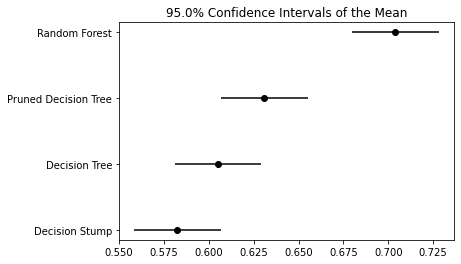

In [63]:
model_means = {
    'Decision Tree':DecisionTreeMeans3,
    'Random Forest':RandomForestMeans3,
    'Decision Stump':DecisionStumpMeans3,
    'Pruned Decision Tree':prunedDecisionTreeMeans3
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)

TASK 6
======

Adding 5% class noise to the data.

In [27]:
random = np.random.default_rng()

flipping = random.binomial(1, 0.05, y.shape).astype(bool)
yFlipped = np.where(flipping, 1 - y, y)

newFlipping = list(chain.from_iterable(flipping))
newFlippingArray = np.asarray(newFlipping)

newY = list(chain.from_iterable(y))
newYArray = np.asarray(newY)

newYFlipped = list(chain.from_iterable(yFlipped))
newYFlippedArray = np.asarray(newYFlipped)

print(np.c_[newYArray, newYFlippedArray][newFlippingArray])

[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]]


------------------------------
DECISION TREE + 5% CLASS NOISE

In [64]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans4 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, newYFlippedArray, test_size=0.2, random_state = testseed)
    
    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(X_train4, y_train4.ravel())
    predicted = decisionTree.predict(X_test4)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans4.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans4)

DecisionTreeScore = np.mean(DecisionTreeMeans4)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans4)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.655
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.585
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.585
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.595
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.595
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.635
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.565
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.57
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.63
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.655, 0.585, 0.585, 0.595, 0.595, 0.575

------------------------------
RANDOM FOREST + 5% CLASS NOISE

In [65]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans4 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, newYFlippedArray, test_size=0.2, random_state = testseed)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(X_train4, y_train4.ravel())
    predicted = randomForest.predict(X_test4)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans4.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans4)

RandomForestScore = np.mean(RandomForestMeans4)

RandomForestSDframe = pd.DataFrame(RandomForestMeans4)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.705
StratifiedKFold Mean test accuracy: 72.000%

CV score:  0.72 

Random Forest Accuracy:  0.71
StratifiedKFold Mean test accuracy: 70.500%

CV score:  0.705 

Random Forest Accuracy:  0.635
StratifiedKFold Mean test accuracy: 71.800%

CV score:  0.7180000000000001 

Random Forest Accuracy:  0.695
StratifiedKFold Mean test accuracy: 70.800%

CV score:  0.708 

Random Forest Accuracy:  0.68
StratifiedKFold Mean test accuracy: 72.700%

CV score:  0.727 

Random Forest Accuracy:  0.68
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.675
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.68
StratifiedKFold Mean test accuracy: 72.300%

CV score:  0.723 

Random Forest Accuracy:  0.65
StratifiedKFold Mean test accuracy: 72.200%

CV score:  0.722 

Random Forest Accuracy:  0.67
StratifiedKFold Mean test accuracy: 72.100%

CV score:  0.7209999999999999 

[0.705, 0.71, 0.635, 0.695, 0.6

-------------------------------
DECISION STUMP + 5% CLASS NOISE

In [67]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans4 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, newYFlippedArray, test_size=0.2, random_state = testseed)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(X_train4, y_train4.ravel())
    predicted = decisionStump.predict(X_test4)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans4.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans4)

DecisionStumpScore = np.mean(DecisionStumpMeans4)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans4)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.605
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.57
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.615
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.6
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.575
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.615
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.585
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.525
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.575
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.60

-------------------------------------
PRUNED DECISION TREE + 5% CLASS NOISE

In [68]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans4 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, newYFlippedArray, test_size=0.2, random_state = testseed)
    
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(X_train4, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)
    
    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(X_train4, y_train4.ravel())
    predicted = prunedDecisionTree.predict(X_test4)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans4.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans4)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans4)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans4)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.039776445637119184
Pruned Decision Tree Accuracy:  0.5
StratifiedKFold Mean test accuracy: 51.400%

CV score:  0.514 

0.002604166666666667
Pruned Decision Tree Accuracy:  0.585
StratifiedKFold Mean test accuracy: 65.200%

CV score:  0.652 

0.004961638131414177
Pruned Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 67.100%

CV score:  0.671 

0.006845190779014309
Pruned Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 65.000%

CV score:  0.65 

0.00881857230667262
Pruned Decision Tree Accuracy:  0.635
StratifiedKFold Mean test accuracy: 67.200%

CV score:  0.672 

0.01243593740576776
Pruned Decision Tree Accuracy:  0.605
StratifiedKFold Mean test accuracy: 66.000%

CV score:  0.6599999999999999 

0.0025950292397660824
Pruned Decision Tree Accuracy:  0.655
StratifiedKFold Mean test accuracy: 65.700%

CV score:  0.6569999999999999 

0.013749240163572096
Pruned Decision Tree Accuracy:  0.58
StratifiedKFold Mean test accuracy: 64.300%

CV score:  0.64

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.655          0.705           0.605                 0.500
1          0.585          0.710           0.570                 0.585
2          0.585          0.635           0.555                 0.615
3          0.595          0.695           0.615                 0.620
4          0.595          0.680           0.600                 0.635
5          0.575          0.680           0.575                 0.605
6          0.635          0.675           0.615                 0.655
7          0.565          0.680           0.585                 0.580
8          0.570          0.650           0.525                 0.625
9          0.630          0.670           0.575                 0.630
RankResult(rankdf=
                      meanrank   mean       std  ci_lower  ci_upper  \
Random Forest             1.00  0.678  0.022998  0.658638  0.697362   
Pruned Decision Tree      2.40  0.605  0.043205  0.585638  0.624362  

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

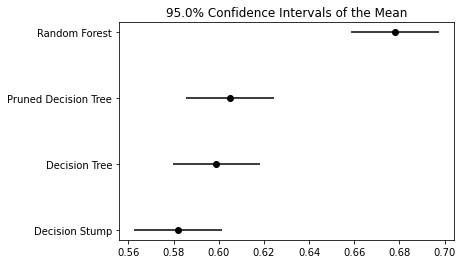

In [69]:
model_means = {
    'Decision Tree':DecisionTreeMeans4,
    'Random Forest':RandomForestMeans4,
    'Decision Stump':DecisionStumpMeans4,
    'Pruned Decision Tree':prunedDecisionTreeMeans4
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)

TASK 7
======

## MODELS WITH TRAINING SET NOISE

----------------------------------
DECISION TREE + TRAINING SET NOISE

In [87]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans5 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_train4))

    xMultiNoise = np.multiply(X_train4, multNoise)

    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(xMultiNoise, y_train4.ravel())
    predicted = decisionTree.predict(X_test4)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans5.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans5)

DecisionTreeScore = np.mean(DecisionTreeMeans5)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans5)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.655
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.64
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.56
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.61
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.615
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.565
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.655, 0.615, 0.59, 0.64, 0.56, 0.61, 0.615,

RANDOM FOREST + TRAINING SET NOISE

In [71]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans5 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_train4))

    xMultiNoise = np.multiply(X_train4, multNoise)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(xMultiNoise, y_train4.ravel())
    predicted = randomForest.predict(X_test4)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans5.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans5)

RandomForestScore = np.mean(RandomForestMeans5)

RandomForestSDframe = pd.DataFrame(RandomForestMeans5)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.725
StratifiedKFold Mean test accuracy: 72.000%

CV score:  0.72 

Random Forest Accuracy:  0.7
StratifiedKFold Mean test accuracy: 70.500%

CV score:  0.705 

Random Forest Accuracy:  0.69
StratifiedKFold Mean test accuracy: 71.800%

CV score:  0.7180000000000001 

Random Forest Accuracy:  0.69
StratifiedKFold Mean test accuracy: 70.800%

CV score:  0.708 

Random Forest Accuracy:  0.7
StratifiedKFold Mean test accuracy: 72.700%

CV score:  0.727 

Random Forest Accuracy:  0.73
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.71
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.675
StratifiedKFold Mean test accuracy: 72.300%

CV score:  0.723 

Random Forest Accuracy:  0.68
StratifiedKFold Mean test accuracy: 72.200%

CV score:  0.722 

Random Forest Accuracy:  0.7
StratifiedKFold Mean test accuracy: 72.100%

CV score:  0.7209999999999999 

[0.725, 0.7, 0.69, 0.69, 0.7, 0.73, 

In [72]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans5 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_train4))

    xMultiNoise = np.multiply(X_train4, multNoise)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(xMultiNoise, y_train4.ravel())
    predicted = decisionStump.predict(X_test4)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans5.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans5)

DecisionStumpScore = np.mean(DecisionStumpMeans5)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans5)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.645
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.585
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.575
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.64
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.665
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.585
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.635
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.53
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.575
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.6

In [73]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans5 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_train4))

    xMultiNoise = np.multiply(X_train4, multNoise)
        
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(xMultiNoise, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)
    
    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(xMultiNoise, y_train4.ravel())
    predicted = prunedDecisionTree.predict(X_test4)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans5.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans5)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans5)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans5)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.009077397502654058
Pruned Decision Tree Accuracy:  0.685
StratifiedKFold Mean test accuracy: 65.300%

CV score:  0.6529999999999999 

0.006977883641381716
Pruned Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 68.000%

CV score:  0.68 

0.005560088957724901
Pruned Decision Tree Accuracy:  0.605
StratifiedKFold Mean test accuracy: 68.400%

CV score:  0.6839999999999999 

0.002895220588235294
Pruned Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 64.000%

CV score:  0.64 

0.005312881562881559
Pruned Decision Tree Accuracy:  0.645
StratifiedKFold Mean test accuracy: 69.700%

CV score:  0.697 

0.006606166490857948
Pruned Decision Tree Accuracy:  0.69
StratifiedKFold Mean test accuracy: 68.300%

CV score:  0.683 

0.016372987350972062
Pruned Decision Tree Accuracy:  0.675
StratifiedKFold Mean test accuracy: 64.500%

CV score:  0.645 

0.008402489743728772
Pruned Decision Tree Accuracy:  0.55
StratifiedKFold Mean test accuracy: 67.000%

CV score:  0.67

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.655          0.725           0.645                 0.685
1          0.615          0.700           0.585                 0.670
2          0.590          0.690           0.575                 0.605
3          0.640          0.690           0.640                 0.620
4          0.560          0.700           0.665                 0.645
5          0.610          0.730           0.585                 0.690
6          0.615          0.710           0.635                 0.675
7          0.620          0.675           0.555                 0.550
8          0.565          0.680           0.530                 0.625
9          0.620          0.700           0.575                 0.670
RankResult(rankdf=
                      meanrank    mean       std  ci_lower  ci_upper  \
Random Forest             1.00  0.7000  0.017795  0.678465  0.721535   
Pruned Decision Tree      2.50  0.6435  0.043973  0.621965  0.66503

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

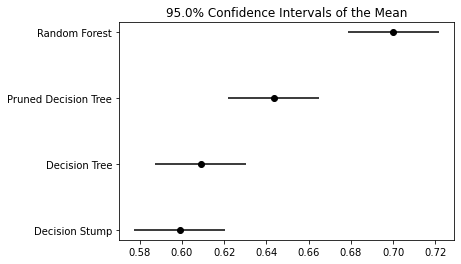

In [88]:
model_means = {
    'Decision Tree':DecisionTreeMeans5,
    'Random Forest':RandomForestMeans5,
    'Decision Stump':DecisionStumpMeans5,
    'Pruned Decision Tree':prunedDecisionTreeMeans5
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)

## MODELS WITH TEST SET NOISE

In [75]:
decisionTree = DecisionTreeClassifier(random_state = seed)

DecisionTreeCVMeans = []
DecisionTreeMeans6 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_test4))

    xTestMultiNoise = np.multiply(X_test4, multNoise)

    decisionTree = DecisionTreeClassifier(random_state= testseed)
    decisionTree.fit(X_train4, y_train4.ravel())
    predicted = decisionTree.predict(xTestMultiNoise)
    print("Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionTreeMeans6.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionTreeCVMeans.append(score)
    
print(DecisionTreeMeans6)

DecisionTreeScore = np.mean(DecisionTreeMeans6)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans6)
DecisionTreeSD = DecisionTreeSDframe.std()


print("Decision Tree mean score for the dataset is: ", DecisionTreeScore)

Decision Tree Accuracy:  0.68
StratifiedKFold Mean test accuracy: 63.000%

CV score:  0.6300000000000001 

Decision Tree Accuracy:  0.6
StratifiedKFold Mean test accuracy: 61.700%

CV score:  0.617 

Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 62.000%

CV score:  0.62 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

Decision Tree Accuracy:  0.575
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Tree Accuracy:  0.65
StratifiedKFold Mean test accuracy: 63.300%

CV score:  0.633 

Decision Tree Accuracy:  0.645
StratifiedKFold Mean test accuracy: 62.200%

CV score:  0.622 

Decision Tree Accuracy:  0.595
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Tree Accuracy:  0.64
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 62.800%

CV score:  0.628 

[0.68, 0.6, 0.59, 0.575, 0.575, 0.65, 0.645, 0

In [76]:
randomForest = RandomForestClassifier(random_state = seed)

RandomForestCVMeans = []
RandomForestMeans6 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_test4))

    xTestMultiNoise = np.multiply(X_test4, multNoise)
    
    randomForest = RandomForestClassifier(random_state= testseed)
    randomForest.fit(X_train4, y_train4.ravel())
    predicted = randomForest.predict(xTestMultiNoise)
    print("Random Forest Accuracy: ", accuracy_score(y_test4, predicted))
    RandomForestMeans6.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(randomForest, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    RandomForestCVMeans.append(score)
    
print(RandomForestMeans6)

RandomForestScore = np.mean(RandomForestMeans6)

RandomForestSDframe = pd.DataFrame(RandomForestMeans6)
RandomForestSD = RandomForestSDframe.std()


print("Random Forest mean score for the dataset is: ", RandomForestScore)

Random Forest Accuracy:  0.74
StratifiedKFold Mean test accuracy: 72.000%

CV score:  0.72 

Random Forest Accuracy:  0.7
StratifiedKFold Mean test accuracy: 70.500%

CV score:  0.705 

Random Forest Accuracy:  0.725
StratifiedKFold Mean test accuracy: 71.800%

CV score:  0.7180000000000001 

Random Forest Accuracy:  0.66
StratifiedKFold Mean test accuracy: 70.800%

CV score:  0.708 

Random Forest Accuracy:  0.735
StratifiedKFold Mean test accuracy: 72.700%

CV score:  0.727 

Random Forest Accuracy:  0.72
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.68
StratifiedKFold Mean test accuracy: 71.400%

CV score:  0.714 

Random Forest Accuracy:  0.66
StratifiedKFold Mean test accuracy: 72.300%

CV score:  0.723 

Random Forest Accuracy:  0.69
StratifiedKFold Mean test accuracy: 72.200%

CV score:  0.722 

Random Forest Accuracy:  0.685
StratifiedKFold Mean test accuracy: 72.100%

CV score:  0.7209999999999999 

[0.74, 0.7, 0.725, 0.66, 0.735, 0

In [77]:
decisionStump = DecisionTreeClassifier(max_depth=1,random_state = seed)

DecisionStumpCVMeans = []
DecisionStumpMeans6 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_test4))

    xTestMultiNoise = np.multiply(X_test4, multNoise)
    
    decisionStump = DecisionTreeClassifier(max_depth=1,random_state = testseed)
    decisionStump.fit(X_train4, y_train4.ravel())
    predicted = decisionStump.predict(xTestMultiNoise)
    print("Decision Stump Accuracy: ", accuracy_score(y_test4, predicted))
    DecisionStumpMeans6.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(decisionStump, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    DecisionStumpCVMeans.append(score)
    
print(DecisionStumpMeans6)

DecisionStumpScore = np.mean(DecisionStumpMeans6)

DecisionStumpframe = pd.DataFrame(DecisionStumpMeans6)
DecisionStumpSD = DecisionStumpframe.std()


print("Decision Stump mean score for the dataset is: ", DecisionStumpScore)

Decision Stump Accuracy:  0.635
StratifiedKFold Mean test accuracy: 61.000%

CV score:  0.61 

Decision Stump Accuracy:  0.58
StratifiedKFold Mean test accuracy: 61.300%

CV score:  0.613 

Decision Stump Accuracy:  0.575
StratifiedKFold Mean test accuracy: 60.700%

CV score:  0.607 

Decision Stump Accuracy:  0.62
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.592 

Decision Stump Accuracy:  0.64
StratifiedKFold Mean test accuracy: 60.800%

CV score:  0.6079999999999999 

Decision Stump Accuracy:  0.595
StratifiedKFold Mean test accuracy: 60.300%

CV score:  0.603 

Decision Stump Accuracy:  0.64
StratifiedKFold Mean test accuracy: 60.900%

CV score:  0.609 

Decision Stump Accuracy:  0.555
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.589 

Decision Stump Accuracy:  0.51
StratifiedKFold Mean test accuracy: 59.200%

CV score:  0.5919999999999999 

Decision Stump Accuracy:  0.55
StratifiedKFold Mean test accuracy: 58.900%

CV score:  0.5890000000000001 

[0.635, 

In [79]:
prunedDecisionTree = DecisionTreeClassifier(random_state = seed)

prunedDecisionTreeCVMeans = []
prunedDecisionTreeMeans6 = []

testseed = 333
for i in range(0, 10):
    
    X_train4, X_test4, y_train4, y_test4 = train_test_split(newX, y, test_size=0.2, random_state = testseed)
    
    multNoise = np.random.normal(1, 0.2, np.shape(X_test4))

    xTestMultiNoise = np.multiply(X_test4, multNoise)
        
    X_train4VAL, X_val, y_train4VAL, y_val = train_test_split(xMultiNoise, y_train4, test_size=0.2, random_state = testseed)
    
    treePath = DecisionTreeClassifier(random_state=testseed).cost_complexity_pruning_path(X_train4VAL, y_train4VAL)
    
    accuracyScores = []
    
    for i in treePath.ccp_alphas:
        accuracyScores.append(DecisionTreeClassifier(ccp_alpha=i, random_state=testseed).fit(X_train4VAL, y_train4VAL).score(X_val, y_val))
        
    bestAlphaValue = treePath.ccp_alphas[np.argmax(accuracyScores)]
    print(bestAlphaValue)
    
    prunedDecisionTree = DecisionTreeClassifier(ccp_alpha=bestAlphaValue, random_state = testseed)
    prunedDecisionTree.fit(X_train4, y_train4.ravel())
    predicted = prunedDecisionTree.predict(xTestMultiNoise)
    print("Pruned Decision Tree Accuracy: ", accuracy_score(y_test4, predicted))
    prunedDecisionTreeMeans6.append(accuracy_score(y_test4, predicted))
    
    multi = StratifiedKFold(n_splits = 5, shuffle = True, random_state = testseed)
    scoreList = cross_val_score(prunedDecisionTree, newX, y.ravel(), cv=multi)
    print(f"StratifiedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print("CV score: ",score,'\n')
    testseed += 50
    prunedDecisionTreeCVMeans.append(score)
    
print(prunedDecisionTreeMeans6)

prunedDecisionTreeScore = np.mean(prunedDecisionTreeMeans6)

prunedDecisionTreeframe = pd.DataFrame(prunedDecisionTreeMeans6)
prunedDecisionTreeSD = prunedDecisionTreeframe.std()


print("Pruned Decision Tree mean score for the dataset is: ", prunedDecisionTreeScore)

0.006333807744188041
Pruned Decision Tree Accuracy:  0.675
StratifiedKFold Mean test accuracy: 66.800%

CV score:  0.668 

0.004683677477275278
Pruned Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 66.500%

CV score:  0.6649999999999999 

0.0035217391304347805
Pruned Decision Tree Accuracy:  0.62
StratifiedKFold Mean test accuracy: 66.400%

CV score:  0.664 

0.007057069744221267
Pruned Decision Tree Accuracy:  0.665
StratifiedKFold Mean test accuracy: 64.900%

CV score:  0.649 

0.0013888888888888887
Pruned Decision Tree Accuracy:  0.59
StratifiedKFold Mean test accuracy: 62.600%

CV score:  0.626 

0.0023809523809523807
Pruned Decision Tree Accuracy:  0.67
StratifiedKFold Mean test accuracy: 65.200%

CV score:  0.6519999999999999 

0.00677668818853009
Pruned Decision Tree Accuracy:  0.695
StratifiedKFold Mean test accuracy: 67.800%

CV score:  0.678 

0.0024999999999999996
Pruned Decision Tree Accuracy:  0.63
StratifiedKFold Mean test accuracy: 64.000%

CV score:  

   Decision Tree  Random Forest  Decision Stump  Pruned Decision Tree
0          0.680          0.740           0.635                 0.675
1          0.600          0.700           0.580                 0.590
2          0.590          0.725           0.575                 0.620
3          0.575          0.660           0.620                 0.665
4          0.575          0.735           0.640                 0.590
5          0.650          0.720           0.595                 0.670
6          0.645          0.680           0.640                 0.695
7          0.595          0.660           0.555                 0.630
8          0.640          0.690           0.510                 0.635
9          0.590          0.685           0.550                 0.570
RankResult(rankdf=
                      meanrank    mean       std  ci_lower  ci_upper  \
Random Forest              1.2  0.6995  0.029387  0.676359  0.722641   
Pruned Decision Tree       2.3  0.6340  0.041952  0.610859  0.65714

C:\Users\Jordan\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<AxesSubplot:title={'center':'95.0% Confidence Intervals of the Mean'}>

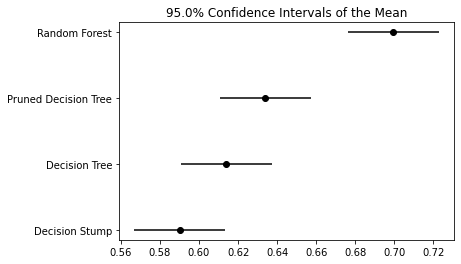

In [80]:
model_means = {
    'Decision Tree':DecisionTreeMeans6,
    'Random Forest':RandomForestMeans6,
    'Decision Stump':DecisionStumpMeans6,
    'Pruned Decision Tree':prunedDecisionTreeMeans6
}

data = pd.DataFrame (model_means, columns = ['Decision Tree', 'Random Forest', 'Decision Stump', 'Pruned Decision Tree'])
print(data)
results = autorank(data, verbose=False)
print(results)
create_report(results)
plot_stats(results)